In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [291]:
train=pd.read_csv("train.csv")
train.shape

(330045, 7)

In [292]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [293]:
train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [294]:
train.Tag.value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

In [295]:
train.drop(['Username'],axis=1,inplace=True)
train.drop(['ID'],axis=1,inplace=True)

In [296]:
train.shape

(330045, 5)

In [297]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


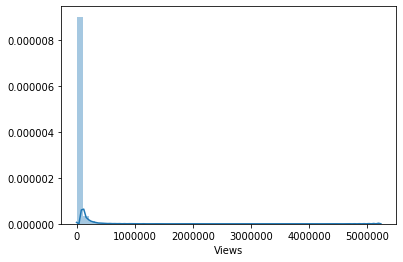

In [298]:
sns.distplot(train.Views)

In [299]:
train=train.drop(train[train.Views > 3000000].index)

In [300]:
#-----------> converting categorical into binary using label encoder
le=LabelEncoder()

In [301]:
train['Tag']=le.fit_transform(train['Tag'])

In [302]:
train.shape

(330032, 5)

In [303]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


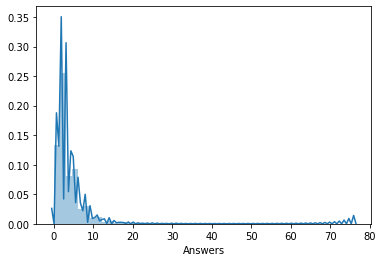

In [304]:
sns.distplot(train.Answers)

In [305]:
from sklearn.preprocessing import Binarizer
bn= Binarizer(threshold=7)
pd_watched=bn.transform([train['Answers']])[0]

In [306]:
train['pd_watched']=pd_watched
train.head()

,Tag,Reputation,Answers,Views,Upvotes,pd_watched
0,0,3942.0,2.0,7855.0,42.0,0.0
1,0,26046.0,12.0,55801.0,1175.0,1.0
2,1,1358.0,4.0,8067.0,60.0,0.0
3,0,264.0,3.0,27064.0,9.0,0.0
4,1,4271.0,4.0,13986.0,83.0,0.0


In [307]:
target=train['Upvotes']

In [308]:
feature_names = [x for x in train.columns if x not in ['Upvotes']] #selecting features
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[feature_names], target,test_size = 0.22,random_state =205)
sc_X = StandardScaler()  #@standradization
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [309]:
polynomial_features= PolynomialFeatures(degree=4,interaction_only=False,include_bias=True)
x_poly = polynomial_features.fit_transform(x_train)
model=linear_model.LassoLars(alpha=0.021,max_iter=150)
#model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)
print(rmse)
print(r2)

925.0753453237683
0.929773978964262


In [310]:
test = pd.read_csv('test.csv')
ids = test['ID']
test.drop(['ID','Username'], axis=1,inplace =True)

In [311]:
test.head()

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0


In [312]:
test.corr()

,Reputation,Answers,Views
Reputation,1.000000,0.072639,0.038193
Answers,0.072639,1.000000,0.517076
Views,0.038193,0.517076,1.000000


In [313]:
# sns.pairplot(test)


In [314]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=7)
pd_watched = bn.transform([test['Answers']])[0]
test['pd_watched'] = pd_watched
labelencoder_X = LabelEncoder()
test['Tag'] = labelencoder_X.fit_transform(test['Tag'])

test = sc_X.fit_transform(test)


In [315]:
   


pred_test = model.predict(polynomial_features.fit_transform(test))
pred_test=abs(pred_test)

In [316]:
pred_test

array([206.6980678 , 120.64743888,  49.80921052, ...,  62.99499527,
        36.20550966,  20.2455978 ])

In [317]:
submission = pd.DataFrame({'ID': ids,
                           'Upvotes':pred_test
                           })

submission.to_csv("final_sub1.csv",index=False)